The modules and data files necessary are found on https://github.com/gregoireaufort/Deep-cigale
The content of sed_modules should be added to pcigale/sed_module, and the content of data to pcigale/data



In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pcigale import sed
from pcigale import sed_modules as modules
from copy import deepcopy
from astropy.table import Table
import pandas as pd
import timeit

In [2]:
%pylab inline
%config InlineBackend.figure_format='svg'
matplotlib.rcParams['figure.figsize'] = [11.,5.]

Populating the interactive namespace from numpy and matplotlib


In [3]:
import random

We first set the parameters, and put everything regarding the deep modules in a dataframe which is saved in a file.  It's necessary to modify the module by giving it the path of the parameter file explicitly (line 29 of "deep_nebular.py")

In [4]:
n =1000
tau_main = 10**np.random.uniform(2,5,n)
age_main = np.random.uniform(501,10000,n)
tau_burst = np.random.uniform(100,10000,n) 
age_burst = 10**np.random.uniform(1,np.log10(500),n)
metallicity = random.choices([0.0001, 0.0004, 0.004, 0.008, 0.02,0.05],k=n)
f_burst = np.random.uniform(0,0.05,n)
geometrical_factor = np.random.uniform(0.03,3,n)
Age = np.random.uniform(1,6,n)
log_O_H = np.random.uniform(-5.4,-2.8,n)
log_N_O = np.random.uniform(-2,0,n)
HbFrac = np.random.uniform(0,1,n)
logU = np.round(np.random.uniform(-3,-1,n),1)
f_esc = np.random.uniform(0.,0.5,n)
f_dust = np.random.uniform(0.,0.5,n)
lines_width = 300
E_BV_lines = random.choices([0.0, 0.01, 0.1, 0.5, 1.0],k=n)
E_BV_factor = 0.44
uv_bump_wavelength = 217.5
uv_bump_width = 35.0
uv_bump_amplitude = 0.0
powerlaw_slope = 0.0
Ext_law_emission_lines = 1
Rv = 3.1
qpah = random.choices([ 0.47, 1.12, 1.77,2.50, 3.19, 3.90, 4.58, 5.26, 5.95, 6.63, 7.32],k=n)
umin = random.choices([0.100, 0.120, 0.150, 0.170, 0.200, 0.250,
                       0.300, 0.350, 0.400, 0.500, 0.600, 0.700,
                       0.800, 1.000, 1.200, 1.500, 1.700, 2.000,
                       2.500, 3.000,3.500, 4.000, 5.000, 6.000,
                       7.000, 8.000, 10.00, 12.00, 15.00,17.00,
                       20.00, 25.00, 30.00, 35.00, 40.00, 50.00],k=n)
alpha = np.round(np.random.uniform(1.0,3,n),1)
gamma = np.random.uniform(0.,1.,n)
params = pd.DataFrame({"deep_nebular.logU" : logU,
                     "deep_nebular.geometrical_factor" : geometrical_factor,
                     "deep_nebular.Age" : Age,
                     "deep_nebular.log_O_H" : log_O_H,
                     "deep_nebular.log_N_O" : log_N_O,
                     "deep_nebular.HbFrac" : HbFrac,
                     "deep_nebular.f_esc" : f_esc,
                     "deep_nebular.f_dust" : f_dust,
                     "deep_nebular.lines_width" : lines_width,
                     "deep_nebular.emission" : True,
                     })
params.to_csv("/home/aufort/Desktop/cigale-master/params_nebular.txt", index = False, sep = " ")

In [5]:
%pdb

Automatic pdb calling has been turned ON


Once this is done, the module is called as any other module, and almost every SED properties are still available.
For now the code is slow due to the PyNeb call (the deep_cloudy call is extremely fast)

/home/aufort/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/aufort/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/aufort/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/aufort/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.22.1 when using version 0.23.2. T

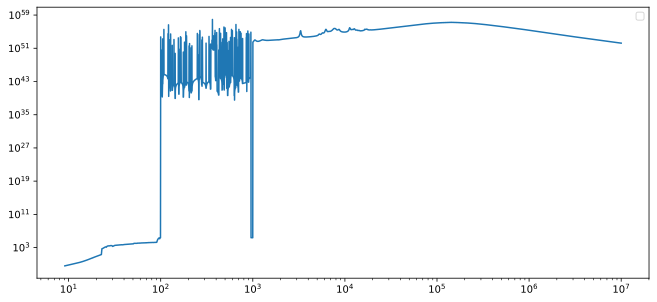

In [6]:
gal = sed.SED()
mod = modules.get_module('sfhdelayed', 
                         tau_main=tau_main[0],
                         age_main = age_main[0],
                         tau_burst=tau_burst[0],
                         age_burst =age_burst[0],
                         f_burst=f_burst[0],
                         sfr_A = 1.0)
mod.process(gal)
mod = modules.get_module('bc03', 
                         imf=1,
                         metallicity=metallicity[0])
mod.process(gal)
mod = modules.get_module('deep_nebular',
                         logU = logU[0], 
                         geometrical_factor = geometrical_factor[0],
                         Age = Age[0],
                         log_O_H = log_O_H[0],
                         log_N_O = log_N_O[0],
                         HbFrac = HbFrac[0],
                         f_esc = f_esc[0],
                         f_dust= f_dust[0] , 
                         lines_width = 300,
                         emission = "True")
mod.process(gal)
mod = modules.get_module('dustatt_modified_starburst',
                          E_BV_lines = 0.1, 
                          E_BV_factor = 0.44,
                          uv_bump_wavelength = 217.5,
                          uv_bump_width = 35.0,
                          uv_bump_amplitude = 0.0,
                          powerlaw_slope = 0.0,
                          Ext_law_emission_lines = 1,
                          Rv = 3.1,
                          filters = "B_B90 & V_B90 & FUV")
mod.process(gal)
mod= modules.get_module('dl2014',
                         qpah = qpah[0],
                         umin = umin[0],
                         alpha = alpha[0],
                         gamma = gamma[0])
mod.process(gal)
plt.loglog(gal.wavelength_grid, gal.fnu)

No handles with labels found to put in legend.


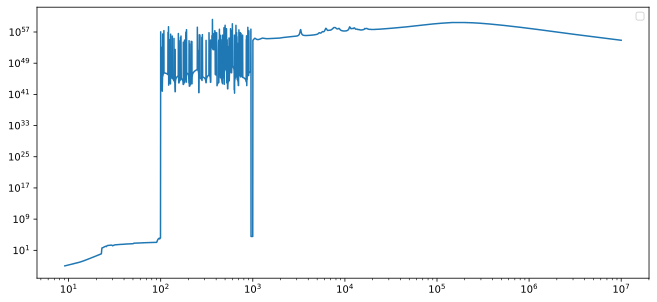

In [7]:
gal2 = sed.SED()
mod = modules.get_module('sfhdelayed', 
                         tau_main=tau_main[1],
                         age_main = age_main[1],
                         tau_burst=tau_burst[1],
                         age_burst =age_burst[1],
                         f_burst=f_burst[1],
                         sfr_A = 1.0)
mod.process(gal2)
mod = modules.get_module('bc03', 
                         imf=1,
                         metallicity=metallicity[1])
mod.process(gal2)
mod = modules.get_module('deep_nebular',
                         logU = logU[1], 
                         geometrical_factor = geometrical_factor[1],
                         Age = Age[1],
                         log_O_H = log_O_H[1],
                         log_N_O = log_N_O[1],
                         HbFrac = HbFrac[1],
                         f_esc = f_esc[1],
                         f_dust= f_dust[1] , 
                         lines_width = 300,
                         emission = "True")
mod.process(gal2)
mod = modules.get_module('dustatt_modified_starburst',
                          E_BV_lines = 0.1, 
                          E_BV_factor = 0.44,
                          uv_bump_wavelength = 217.5,
                          uv_bump_width = 35.0,
                          uv_bump_amplitude = 0.0,
                          powerlaw_slope = 0.0,
                          Ext_law_emission_lines = 1,
                          Rv = 3.1,
                          filters = "B_B90 & V_B90 & FUV")
mod.process(gal2)
mod= modules.get_module('dl2014',
                         qpah = qpah[1],
                         umin = umin[1],
                         alpha = alpha[1],
                         gamma = gamma[1])
mod.process(gal2)
plt.loglog(gal2.wavelength_grid, gal2.fnu)
plt.legend()

In [16]:
gal2.lines["H__1_486133A"]

0.45215532733085495

In [17]:
mod = modules.get_module('deep_nebular',
                         logU = logU[1], 
                         geometrical_factor = geometrical_factor[1],
                         Age = Age[1],
                         log_O_H = log_O_H[1],
                         log_N_O = log_N_O[1],
                         HbFrac = HbFrac[1],
                         f_esc = f_esc[1],
                         f_dust= f_dust[1] , 
                         lines_width = 300,
                         emission = "True")

In [22]:
gal2.lines["H__1_486133A"]/(mod.corr * gal2.info['stellar.n_ly_young'])

array([4.85316950e-41, 2.31226685e+31, 2.01375845e+33])